In [ ]:
# Part 1 (0.5 point)

# Study their content from the course descriptions and list FIVE courses that you find interesting. Write them down with links.

#Course 1
# Data-engineering-for-everyone.
# https://learn.datacamp.com/courses/data-engineering-for-everyone.
# the objective of taking this course is to solidify my base  knowledge 
#and understand the topics without having to think about the actual coding.

#Course 2
# Python-for-data-science
# https://learn.datacamp.com/courses/intro-to-python-for-data-science
# Here, I will learn data engineer’s core responsibilities, how they differ from data scientists, 
# and how they facilitate the flow of data through an organization.
# Get Insight into understanding how the data engineers collect, clean, and catalog their data.


# Course 3
# Introduction-to-sql
# https://learn.datacamp.com/courses/introduction-to-sql
# The role of a data scientist is to turn raw data into actionable insights.
# To be an effective data scientist, we must know how to wrangle, 
extract data from these databases using a language called SQL .
# Since we already did some SQL in School, I will like to deepen my knowledge more in data Science with SQL.

# Course 4
# Data Manipulation with Pandas
# https://learn.datacamp.com/courses/data-manipulation-with-pandas
# Since we have done a little of data manipulation with Deepak, 
# like using DataFrames, the core of pandas, aggregating data to gather insights, slicing and
# indexing to subset DataFrames and visualizing  data, deal with missing data, and read data into a DataFrame.
# It will be useful to continue on this path.

# Course 5
# Intermediate-R
# https://learn.datacamp.com/courses/intermediate-r
# My interest in looking through this would be to compare R with Python and just on the surface not going deep with it.
# I will do these by going through conditional statements, loops, and functions,
# regular expressions, data structure manipulationin R scripts.
    

In [ ]:
# Part 2 (total 1.5 point)

# Explain with few words what the data is all about?
# The datasets is about all airlines and the incident and fatalities
# rate and year range and # Should Travelers Avoid 
# Flying Airlines That Have Had Crashes in the Past?


# Train meaningful linear regression model using that data

I have trained my linear regression model using the data from my csv file  and
calculates the KPIs such as covariance, correlation, R2 score, etc. 
Also with these calculations, there are also scatter 
graphs which help to get a visual representation of the type of 
datpoints we have\n'

# Use the model to make predictions
In the model prediction it shows the incidents and fatalities rate within a 
given range of year and the prediction can tell that likely flight company
that has more risk of incidents based on previous record.

In [ ]:
# Introduction to Linear Modeling in Python, Go through the first three parts/chapters of the course. Part 4 can now be skipped.
# Pay attention to  concepts like interpolation, extrapolation, covariance, correlation, linear regression model, slope, intercept, residuals, RSS, Least-Square optimization, goodness-of-fit, RMSE, R-square, standard error etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d

In [2]:
#Note: to check the current working directory, please type pwd
%pwd
#you may either write the complete path for the data set or save it in the same directory where your notebook file is
# to change your working directory (if needed) use cd 
%cd C:\Users\johna\Documents\Anaconda3Files\Data_Cleaning
    
fatality = pd.read_csv('airline-safety1.csv') 

C:\Users\johna\Documents\Anaconda3Files\Data_Cleaning


In [3]:
# Prview the first 5 lines of the loaded data
fatality.head(5)


,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99
0,Aer Lingus,320906734,2,0,0
1,Aeroflot*,1197672318,76,14,128
2,Aerolineas Argentinas,385803648,6,0,0
3,Aeromexico*,596871813,3,1,64
4,Air Canada,1865253802,2,0,0


In [4]:
fatality.shape #(rows, columns)

(56, 5)

In [5]:
fatality.describe().T

,count,mean,std,min,25%,50%,75%,max
avail_seat_km_per_week,56.0,1.384621e+09,1.465317e+09,259373346.0,4.740362e+08,802908893.0,1.847239e+09,7.139291e+09
incidents_85_99,56.0,7.178571e+00,1.103566e+01,0.0,2.000000e+00,4.0,8.000000e+00,7.600000e+01
fatal_accidents_85_99,56.0,2.178571e+00,2.861069e+00,0.0,0.000000e+00,1.0,3.000000e+00,1.400000e+01
fatalities_85_99,56.0,1.124107e+02,1.466911e+02,0.0,0.000000e+00,48.5,1.842500e+02,5.350000e+02


In [6]:
fatality = {'incidents_85_99': [0.1, 12.1, 20.2, 33.1, 40.2, 55.3, 60.5, 75.1, 80.6, 90],
        'fatalities_85_99': [0, 55, 110, 165, 215, 270, 325, 380, 435, 550]
        }

df = pd.DataFrame(fatality, columns = ['incidents_85_99', 'fatalities_85_99'])

In [7]:
df

,incidents_85_99,fatalities_85_99
0,0.1,0
1,12.1,55
2,20.2,110
3,33.1,165
4,40.2,215
5,55.3,270
6,60.5,325
7,75.1,380
8,80.6,435
9,90.0,550


In [8]:
incidents = df['incidents_85_99'].to_frame()

In [9]:
fatalities = df['fatalities_85_99']

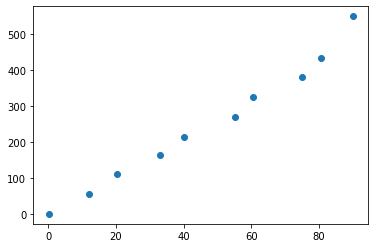

In [10]:
plt.scatter(incidents,fatalities)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg_model = LinearRegression().fit(incidents,fatalities)

In [13]:
reg_model

LinearRegression()

In [14]:
reg_model.coef_

array([5.67729777])

In [15]:
reg_model.intercept_

-14.743351670321317

In [16]:
x1 = np.linspace(0, 80,100)

In [17]:
y1=reg_model.coef_*x1 + reg_model.intercept_

# testing, what would happen if the coefficient would be bit different, see the figure below
y2=40*x1 + reg_model.intercept_  

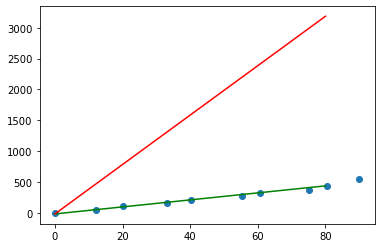

In [18]:
plt.scatter(incidents,fatalities)
plt.plot(x1,y1, 'g')
plt.plot(x1,y2, 'r')

In [19]:
reg_model.predict(pd.DataFrame([0.95]))

array([212.34855901])

In [24]:
#calculating covariance
x1 = np.array([1, 40, 80])
y1 = np.array([1, 40, 80])

x2 = np.array([1, 42, 76])
y2 = np.array([1, 42, 76])

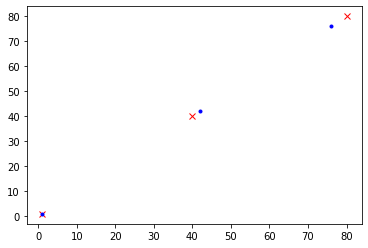

In [27]:
#calculating correlation
plt.plot(x1, y1, 'rx')
plt.plot(x2, y2, 'b.')


In [28]:
r2 = r2_score(incidents,fatalities)
r2

-70.97186162762492

In [29]:
print(np.cov(x1,y1))

[[1560.33333333 1560.33333333]
 [1560.33333333 1560.33333333]]


In [ ]:
print(np.cov(x2,y2))

In [ ]:
print(np.corrcoef(x1,y1))

In [ ]:
x3 = np.array([1, 42, 76])
y3 = np.array([1, 42, 76])